# Import package


In [62]:
# install numpy
# install pandas
# install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning data (Làm sạch dữ liệu)

In [63]:
data_frame_test = pd.read_csv("test.csv")
data_frame_train = pd.read_csv("train.csv")
data_frame = pd.concat([data_frame_test,data_frame_train])
data_frame.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

# Data Visualization (Trực quan hóa dữ liệu)

### Customer type and Personal travel impact on Satisfaction

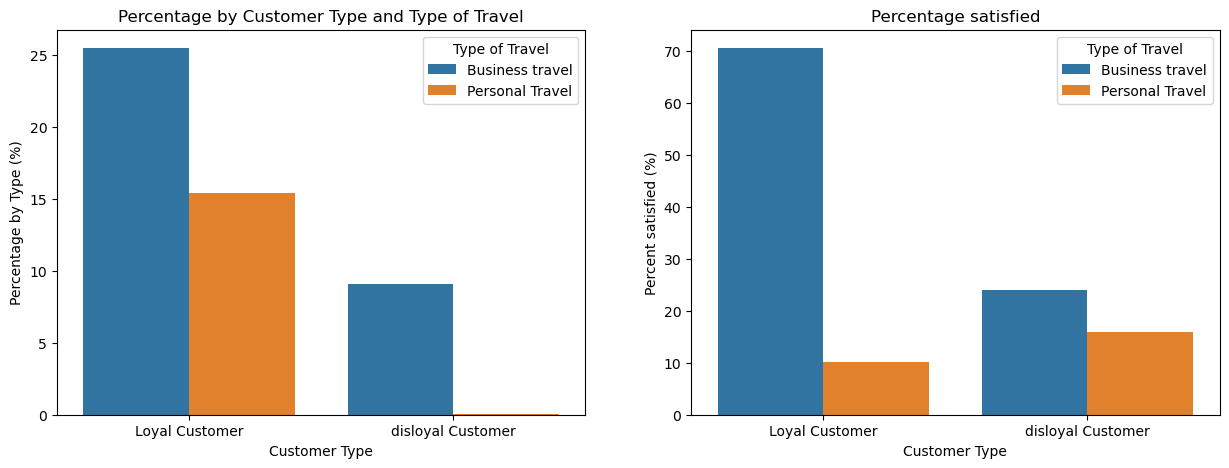

In [105]:
data_frame_copy = data_frame.copy()
data_frame_copy['satisfaction'] = data_frame_copy['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})
df_crosstab = pd.crosstab(
    index=[data_frame_copy['Customer Type'], data_frame_copy['Type of Travel']], 
    columns=data_frame_copy['satisfaction'],  
    margins=True,  
    margins_name="Tong"  
)
df_crosstab
total_count = df_crosstab.iloc[-1, -1]
percent = df_crosstab.div(total_count) * 100
percent = percent.sort_index().drop(index="Tong")
percent = percent.drop(columns="Tong")
percent_reset = percent.reset_index()
percent_long = percent_reset.melt(  id_vars=["Customer Type", "Type of Travel"],
                                    value_vars=[0, 1],
                                    var_name="satisfaction", 
                                    value_name="Percentage by Type (%)")
percent_long = percent_long.drop(columns='satisfaction')
fig , (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.barplot(x="Customer Type", y="Percentage by Type (%)", hue="Type of Travel", data=percent_long, errorbar=None, edgecolor=None, ax=ax1)
ax1.set_title("Percentage by Customer Type and Type of Travel")
ax1.set_ylabel("Percentage by Type (%)")
data_frame_copy["satisfaction"] *= 100
sns.barplot(x="Customer Type", y="satisfaction", hue="Type of Travel", data=data_frame_copy, errorbar=None, edgecolor=None, ax=ax2)
ax2.set_title("Percentage satisfied")
ax2.set_ylabel("Percent satisfied (%)");